## Summary:
Look at airflow separation for the review process. We can use the kernel of underwater or reload the cases with the following.

## <a class="anchor" id="0">Table of content: </a> 

#### [1. Reload cases (optional)](#1)
#### [2. Plot separation](#2)

### <a class="anchor" id="1">Reload cases</a>

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import sys, os
plt.style.use('/projects/DEIKE/jiarongw/jiarongw-postprocessing/media/matplotlib/stylelib/jfm.mplstyle')
from tqdm import tqdm
# import matplotlib as mpl
sys.path.append('/projects/DEIKE/jiarongw/jiarongw-postprocessing/jupyter_notebook/project_specific/windwave/')
from helper import RealWave
from prepare import load_object, save_object
from defs import Case, Interface2D
from matplotlib.ticker import FuncFormatter, MultipleLocator

In [2]:
""" Already knowing the phase at each time, align them
    Read in other fields.
    This is different from the read_fields in prepare.py because we need the 3D field, not its 2D average """

def read_fields (case, field_t=None):
    ux_3D_ensem = []
    uy_3D_ensem = []
    f_3D_ensem = []
    eta_ensem = []
    if (field_t.all == None):
        field_t = case.field_t       
        
    for i,t in tqdm(enumerate(field_t-case.tstart)):

        NSLICE = 256    
        NGRID = 512
        ux_3D = {'name':'ux', 'value':[]} # axis0 in z, axis1 in x, axis2 in y  (in the code)
        uy_3D = {'name':'uy', 'value':[]}
        f_3D = {'name':'f', 'value':[]}
        tsimu = t + case.tstart
        print(tsimu)
        phasei = np.where(np.isclose(np.array(case.phase['t']), t))[0][0]
        idx = case.phase['idx'][phasei]
        eta = np.roll(case.phase['eta'][phasei], -idx, axis=1) 
        eta_ensem.append(eta)

        # Read in the fields either from pickle or from slice data
        for field in (ux_3D,uy_3D,f_3D):         
            """NOTICE: to accomodate different pickle versions"""
            picklename = case.path + 'field/' + 'pickle_tiger/' + field['name']+'_t%g' % tsimu +'.pkl'
    #             picklename = working_dir + 'field/' + 'pickle_desktop/' + field['name']+'_t%g' % t +'.pkl'
            exists = os.path.exists(picklename)
            # If the pickle is there read in the pickles
            if exists:
                field['value'] = load_object(picklename)
                print('pickle restored!')
            # If no pickle read in from the slice files and pickle dump
            if not exists:
                for sn in range (0, NSLICE-1):
                    filename = case.path + 'field/'+field['name']+'_t%g_slice%g' % (tsimu,sn)
                    snapshot = np.loadtxt(filename, dtype = np.str, delimiter='\t')
                    snapshot.reshape([NGRID,NGRID+1])
                    field['value'].append(snapshot[:,0:NGRID].astype(np.float))
                field['value'] = np.array(field['value'])
                save_object(field['value'], picklename)

            # Shift the values along x axis
            field['value'] = np.roll(field['value'], -idx, axis=1)

#         case.ux_2D.append(np.average(ux_3D['value'], axis=0))
#         case.uy_2D.append(np.average(uy_3D['value'], axis=0))
#         case.f_2D.append(np.average(f_3D['value'], axis=0))

        ux_3D_ensem.append(ux_3D['value'])
        uy_3D_ensem.append(uy_3D['value'])
        f_3D_ensem.append(f_3D['value'])
        
    return (eta_ensem, ux_3D_ensem, uy_3D_ensem, f_3D_ensem)

In [3]:
''' Pick a case, and time range '''
from phase import extract_phase

""" CU = 2 """
case1 = Case(ustar=0.25, Retau=720, Bo=200, g=1, ak=0.2, LEVEL=10, emax=0.3, alterMU=16, NOMATCH=True, 
             PRINTWAVE=True, OUTLEVEL=9, prefix='curved_fixREtau_boundary_', working_dir='/projects/DEIKE/jiarongw/turbulence/')
case = case1
case.tstart = 57
case.tsimu = np.arange(58,113,1)
extract_phase(case, case.tsimu)
case.field_t_select = np.array([60, 70, 90, 100])
case.eta_ensem, case.ux_3D_ensem, case.uy_3D_ensem, case.f_3D_ensem = read_fields(case, case.field_t_select)
case.eta_1D_select = [np.average(eta, axis=0) for eta in case.eta_ensem] # eta is already aligned
case.ux_2D_select = [np.average(ux_3D, axis=0) for ux_3D in case.ux_3D_ensem]
case.uy_2D_select = [np.average(uy_3D, axis=0) for uy_3D in case.uy_3D_ensem]
case.f_2D_select = [np.average(f_3D, axis=0) for f_3D in case.f_3D_ensem]

""" CU = 4 """
case2 = Case(ustar=0.25, Retau=720, Bo=200, g=4, ak=0.2, LEVEL=10, emax=0.3, alterMU=8, NOMATCH=True, 
             PRINTWAVE=True, OUTLEVEL=9, prefix='curved_fixREtau_boundary_', working_dir='/projects/DEIKE/jiarongw/turbulence/')
case = case2
case.tstart = 57
case.tsimu = np.arange(58,101,1)
extract_phase(case, case.tsimu)
case.field_t_select = np.array([60, 70, 80, 90])
case.eta_ensem, case.ux_3D_ensem, case.uy_3D_ensem, case.f_3D_ensem = read_fields(case, case.field_t_select)
case.eta_1D_select = [np.average(eta, axis=0) for eta in case.eta_ensem] # eta is already aligned
case.ux_2D_select = [np.average(ux_3D, axis=0) for ux_3D in case.ux_3D_ensem]
case.uy_2D_select = [np.average(uy_3D, axis=0) for uy_3D in case.uy_3D_ensem]
case.f_2D_select = [np.average(f_3D, axis=0) for f_3D in case.f_3D_ensem]

""" CU = 8 """
case3 = Case(ustar=0.25, Retau=720, Bo=200, g=16, ak=0.2, LEVEL=10, emax=0.3, alterMU=4, NOMATCH=True, 
             PRINTWAVE=True, OUTLEVEL=9, prefix='curved_fixREtau_boundary_', working_dir='/projects/DEIKE/jiarongw/turbulence/')
case = case3
case.tstart = 57
case.tsimu = np.arange(58,73,1)
extract_phase(case, case.tsimu)
case.field_t_select = np.array([60, 64, 68, 72])
case.eta_ensem, case.ux_3D_ensem, case.uy_3D_ensem, case.f_3D_ensem = read_fields(case, case.field_t_select)
case.eta_1D_select = [np.average(eta, axis=0) for eta in case.eta_ensem] # eta is already aligned
case.ux_2D_select = [np.average(ux_3D, axis=0) for ux_3D in case.ux_3D_ensem]
case.uy_2D_select = [np.average(uy_3D, axis=0) for uy_3D in case.uy_3D_ensem]
case.f_2D_select = [np.average(f_3D, axis=0) for f_3D in case.f_3D_ensem]

/projects/DEIKE/jiarongw/turbulence/curved_fixREtau_boundary_REtau720_BO200_g1_ak0.2_MU16_LEVEL10_emax0.3/
mu1 = 7.67063e-06, rho1 = 1, mu2 = 2.24719e-06, rho2 = 0.001225, sigma = 0.0003125
Given k = 4 (1/m), calculated omega = 2.00499 (1/s), period = 3.13377 (s), phase speed c = 0.501248 (m/s), wavelength = 1.5708 (m), Bo = 200
g = 1, c = 0.501248, Ustar = 0.25, MURATIO = 0.01831, mu_w = 7.67063e-06, rho_w = 1, mu_a = 2.24719e-06, rho_a = 0.001225, sigma = 0.0003125, Bo = 200, RE = 102646, Re_tau = 720
RELEASETIME = 57, uemax = 0.075 
tiger-h19c2n6.28240Exhausted 1048576 MQ irecv request descriptors, which usually indicates a user program error or insufficient request descriptors (PSM2_MQ_RECVREQS_MAX=1048576)
srun: Job step aborted: Waiting up to 47 seconds for job step to finish.
slurmstepd: error: *** STEP 7188585.0 ON tiger-h19c2n6 CANCELLED AT 2021-09-21T01:12:00 DUE TO TIME LIMIT ***
[warn] Epoll ADD(4) on fd 42 failed.  Old events were 0; read change was 0 (none); write change 

0it [00:00, ?it/s]

60
pickle restored!
pickle restored!
pickle restored!


1it [00:02,  2.85s/it]

70
pickle restored!
pickle restored!
pickle restored!


2it [00:05,  2.80s/it]

90
pickle restored!
pickle restored!
pickle restored!


3it [00:07,  2.47s/it]

100
pickle restored!
pickle restored!
pickle restored!


4it [00:10,  2.58s/it]


/projects/DEIKE/jiarongw/turbulence/curved_fixREtau_boundary_REtau720_BO200_g4_ak0.2_MU8_LEVEL10_emax0.3/
mu1 = 1.53413e-05, rho1 = 1, mu2 = 2.24719e-06, rho2 = 0.001225, sigma = 0.00125
Given k = 4 (1/m), calculated omega = 4.00999 (1/s), period = 1.56688 (s), phase speed c = 1.0025 (m/s), wavelength = 1.5708 (m), Bo = 200
g = 4, c = 1.0025, Ustar = 0.25, MURATIO = 0.01831, mu_w = 1.53413e-05, rho_w = 1, mu_a = 2.24719e-06, rho_a = 0.001225, sigma = 0.00125, Bo = 200, RE = 102646, Re_tau = 720
RELEASETIME = 57, uemax = 0.075 
srun: Job step aborted: Waiting up to 47 seconds for job step to finish.
slurmstepd: error: *** STEP 6251153.0 ON tiger-h21c2n21 CANCELLED AT 2021-04-19T06:24:06 DUE TO TIME LIMIT ***

pickle restored!


0it [00:00, ?it/s]

60
pickle restored!
pickle restored!
pickle restored!


1it [00:02,  2.74s/it]

70
pickle restored!
pickle restored!
pickle restored!


2it [00:05,  2.78s/it]

80
pickle restored!
pickle restored!
pickle restored!


3it [00:08,  2.91s/it]

90
pickle restored!
pickle restored!
pickle restored!


4it [00:11,  2.99s/it]


/projects/DEIKE/jiarongw/turbulence/curved_fixREtau_boundary_REtau720_BO200_g16_ak0.2_MU4_LEVEL10_emax0.3/
mu1 = 3.06825e-05, rho1 = 1, mu2 = 2.24719e-06, rho2 = 0.001225, sigma = 0.005
Given k = 4 (1/m), calculated omega = 8.01998 (1/s), period = 0.783442 (s), phase speed c = 2.00499 (m/s), wavelength = 1.5708 (m), Bo = 200
g = 16, c = 2.00499, Ustar = 0.25, MURATIO = 0.01831, mu_w = 3.06825e-05, rho_w = 1, mu_a = 2.24719e-06, rho_a = 0.001225, sigma = 0.005, Bo = 200, RE = 102646, Re_tau = 720
RELEASETIME = 57, uemax = 0.075 
srun: Job step aborted: Waiting up to 47 seconds for job step to finish.
slurmstepd: error: *** STEP 7313935.0 ON tiger-h19c1n14 CANCELLED AT 2021-09-30T13:42:50 DUE TO TIME LIMIT ***

pickle restored!


0it [00:00, ?it/s]

60
pickle restored!
pickle restored!
pickle restored!


1it [00:02,  3.00s/it]

64
pickle restored!
pickle restored!
pickle restored!


2it [00:06,  3.38s/it]

68
pickle restored!
pickle restored!
pickle restored!


3it [00:10,  3.43s/it]

72
pickle restored!
pickle restored!
pickle restored!


4it [00:13,  3.44s/it]


In [4]:
""" ak = 0.2 was already read in by FullCoupling notebook.
    Read in additional ak = 0.25 """
case4 = Case(ustar=0.25, Retau=720, Bo=200, g=1, ak=0.25, LEVEL=10, emax=0.3, alterMU=16, NOMATCH=True, 
               PRINTWAVE=True, OUTLEVEL=9, working_dir='/projects/DEIKE/jiarongw/turbulence/', prefix='curved_fixREtau_boundary_')
case = case4
case.tstart = 43
case.tsimu = np.arange(43.1,59.5,0.1)
extract_phase(case, case.tsimu)
case.field_t_select = np.array([45,50,55])
case.eta_ensem, case.ux_3D_ensem, case.uy_3D_ensem, case.f_3D_ensem = read_fields(case, case.field_t_select)
case.eta_1D_select = [np.average(eta, axis=0) for eta in case.eta_ensem] # eta is already aligned
case.ux_2D_select = [np.average(ux_3D, axis=0) for ux_3D in case.ux_3D_ensem]
case.uy_2D_select = [np.average(uy_3D, axis=0) for uy_3D in case.uy_3D_ensem]
case.f_2D_select = [np.average(f_3D, axis=0) for f_3D in case.f_3D_ensem]

case5 = Case(ustar=0.25, Retau=720, Bo=200, g=4, ak=0.25, LEVEL=10, emax=0.3, alterMU=8, NOMATCH=True, 
               PRINTWAVE=True, OUTLEVEL=9, working_dir='/projects/DEIKE/jiarongw/turbulence/', prefix='curved_fixREtau_boundary_')
case = case5
case.tstart = 43
case.tsimu = np.arange(43.1,56.6,0.1)
extract_phase(case, case.tsimu)
case.field_t_select = np.array([45,50,55])
case.eta_ensem, case.ux_3D_ensem, case.uy_3D_ensem, case.f_3D_ensem = read_fields(case, case.field_t_select)
case.eta_1D_select = [np.average(eta, axis=0) for eta in case.eta_ensem] # eta is already aligned
case.ux_2D_select = [np.average(ux_3D, axis=0) for ux_3D in case.ux_3D_ensem]
case.uy_2D_select = [np.average(uy_3D, axis=0) for uy_3D in case.uy_3D_ensem]
case.f_2D_select = [np.average(f_3D, axis=0) for f_3D in case.f_3D_ensem]

case6 = Case(ustar=0.25, Retau=720, Bo=200, g=16, ak=0.25, LEVEL=10, emax=0.3, alterMU=4, NOMATCH=True, 
               PRINTWAVE=True, OUTLEVEL=9, working_dir='/projects/DEIKE/jiarongw/turbulence/', prefix='curved_fixREtau_boundary_')
case = case6
case.tstart = 43
case.tsimu = np.arange(43.1,53.6,0.1)
extract_phase(case, case.tsimu)
case.field_t_select = np.array([45,50,53])
case.eta_ensem, case.ux_3D_ensem, case.uy_3D_ensem, case.f_3D_ensem = read_fields(case, case.field_t_select)
case.eta_1D_select = [np.average(eta, axis=0) for eta in case.eta_ensem] # eta is already aligned
case.ux_2D_select = [np.average(ux_3D, axis=0) for ux_3D in case.ux_3D_ensem]
case.uy_2D_select = [np.average(uy_3D, axis=0) for uy_3D in case.uy_3D_ensem]
case.f_2D_select = [np.average(f_3D, axis=0) for f_3D in case.f_3D_ensem]


/projects/DEIKE/jiarongw/turbulence/curved_fixREtau_boundary_REtau720_BO200_g1_ak0.25_MU16_LEVEL10_emax0.3/
mu1 = 7.67063e-06, rho1 = 1, mu2 = 2.24719e-06, rho2 = 0.001225, sigma = 0.0003125
Given k = 4 (1/m), calculated omega = 2.00499 (1/s), period = 3.13377 (s), phase speed c = 0.501248 (m/s), wavelength = 1.5708 (m), Bo = 200
g = 1, c = 0.501248, Ustar = 0.25, MURATIO = 0.29296, mu_w = 7.67063e-06, rho_w = 1, mu_a = 2.24719e-06, rho_a = 0.001225, sigma = 0.0003125, Bo = 200, RE = 102646, Re_tau = 720
RELEASETIME = 43, uemax = 0.075 

pickle restored!


0it [00:00, ?it/s]

45
pickle restored!
pickle restored!
pickle restored!


1it [00:03,  3.47s/it]

50
pickle restored!
pickle restored!
pickle restored!


2it [00:06,  3.36s/it]

55
pickle restored!
pickle restored!
pickle restored!


3it [00:09,  3.26s/it]


/projects/DEIKE/jiarongw/turbulence/curved_fixREtau_boundary_REtau720_BO200_g4_ak0.25_MU8_LEVEL10_emax0.3/
mu1 = 1.53413e-05, rho1 = 1, mu2 = 2.24719e-06, rho2 = 0.001225, sigma = 0.00125
Given k = 4 (1/m), calculated omega = 4.00999 (1/s), period = 1.56688 (s), phase speed c = 1.0025 (m/s), wavelength = 1.5708 (m), Bo = 200
g = 4, c = 1.0025, Ustar = 0.25, MURATIO = 0.14648, mu_w = 1.53413e-05, rho_w = 1, mu_a = 2.24719e-06, rho_a = 0.001225, sigma = 0.00125, Bo = 200, RE = 102646, Re_tau = 720
RELEASETIME = 43, uemax = 0.075 

pickle restored!


0it [00:00, ?it/s]

45
pickle restored!
pickle restored!
pickle restored!


1it [00:02,  2.66s/it]

50
pickle restored!
pickle restored!
pickle restored!


2it [00:05,  2.57s/it]

55
pickle restored!
pickle restored!
pickle restored!


3it [00:07,  2.61s/it]


/projects/DEIKE/jiarongw/turbulence/curved_fixREtau_boundary_REtau720_BO200_g16_ak0.25_MU4_LEVEL10_emax0.3/
mu1 = 3.06825e-05, rho1 = 1, mu2 = 2.24719e-06, rho2 = 0.001225, sigma = 0.005
Given k = 4 (1/m), calculated omega = 8.01998 (1/s), period = 0.783442 (s), phase speed c = 2.00499 (m/s), wavelength = 1.5708 (m), Bo = 200
g = 16, c = 2.00499, Ustar = 0.25, MURATIO = 0.07324, mu_w = 3.06825e-05, rho_w = 1, mu_a = 2.24719e-06, rho_a = 0.001225, sigma = 0.005, Bo = 200, RE = 102646, Re_tau = 720
RELEASETIME = 43, uemax = 0.075 

pickle restored!


0it [00:00, ?it/s]

45
pickle restored!
pickle restored!
pickle restored!


1it [00:02,  2.75s/it]

50
pickle restored!
pickle restored!
pickle restored!


2it [00:05,  2.85s/it]

53
pickle restored!
pickle restored!
pickle restored!


3it [00:08,  2.72s/it]


### Plot separation

/projects/DEIKE/jiarongw/turbulence/curved_fixREtau_boundary_REtau720_BO200_g1_ak0.2_MU16_LEVEL10_emax0.3/
33
0.24064790409465067
/projects/DEIKE/jiarongw/turbulence/curved_fixREtau_boundary_REtau720_BO200_g4_ak0.25_MU8_LEVEL10_emax0.3/
2
0.24427773891641977
/projects/DEIKE/jiarongw/turbulence/curved_fixREtau_boundary_REtau720_BO200_g16_ak0.25_MU4_LEVEL10_emax0.3/
2
0.2464608504173292


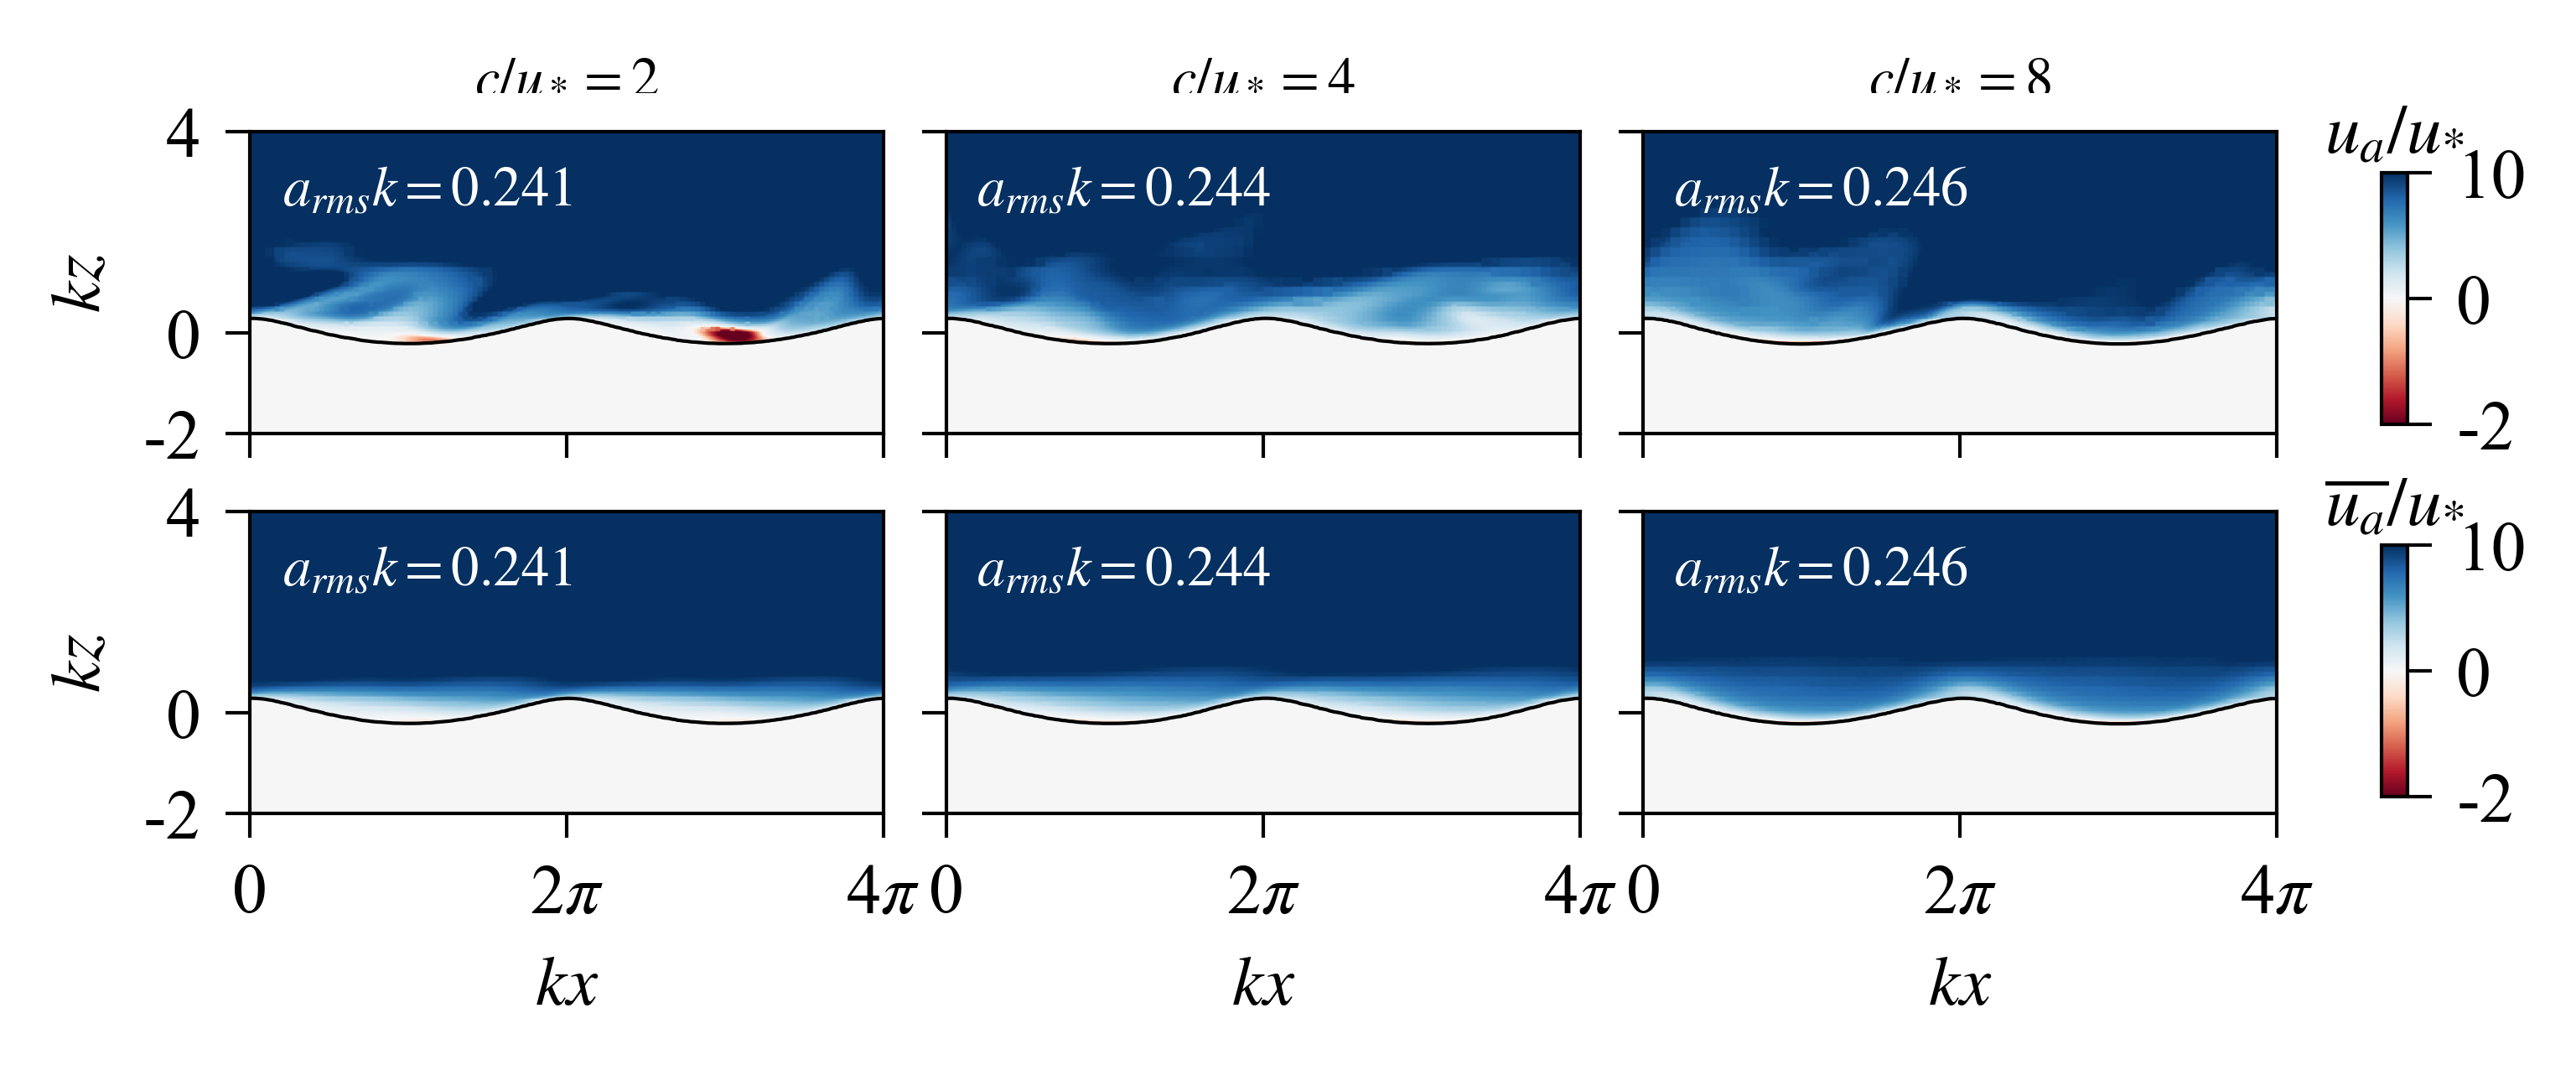

In [5]:
"""Visulization of ux"""

fig, axes = plt.subplots(2,3, sharey='row', sharex='col', figsize=[5.2,2], gridspec_kw={'height_ratios':[1,1], "wspace":0.1, "hspace":0.})

ax = plt.gca()
NGRID = 512

plt.set_cmap('RdBu') # a good start: blue to white to red colormap

# define your scale, with white at zero
import matplotlib.colors as colors
vmin = -2
vmax = 10
norm = colors.TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)

itime_choice = [2,0,0]
for i, case in enumerate([case1,case5,case6]):  
    print(case.path)
    itime = itime_choice[i]
    islice = 135
    print(case.field_t_select[itime] - case.tstart)
    uair = case.ux_3D_ensem[itime][islice,:]*(1-case.f_3D_ensem[itime][islice,:])**2/case.ustar
    uair_aver = np.average(case.ux_3D_ensem[itime]*(1-case.f_3D_ensem[itime])**2/case.ustar, axis=0)
    uair_aver_phase = (uair_aver + np.roll(uair_aver, -128, axis=0) + np.roll(uair_aver, -256, axis=0) + np.roll(uair_aver, -384, axis=0))/4
    img1 = axes[0,i].imshow(np.rot90(uair), extent=[-np.pi,np.pi,-1,2*np.pi-1], norm=norm)
    img2 = axes[1,i].imshow(np.rot90(uair_aver_phase), extent=[-np.pi,np.pi,-1,2*np.pi-1], norm=norm)
    xarray = (np.linspace(-case.L0/2.,case.L0/2.,NGRID,endpoint=True)+case.L0/2**NGRID/2)
    eta_1D = np.average(case.eta_ensem[itime], axis=0) - np.average(case.eta_ensem[itime]) 
    axes[0,i].plot(xarray, eta_1D, c='k', lw=0.5)
    axes[0,i].text(0.28, 0.8, r'$a_{rms}k=%.3f$' %(np.std(eta_1D)*1.414*4), ha='center', va='center', 
                   transform=axes[0,i].transAxes, c='white', fontsize=8)
    axes[1,i].text(0.28, 0.8, r'$a_{rms}k=%.3f$' %(np.std(eta_1D)*1.414*4), ha='center', va='center', 
                   transform=axes[1,i].transAxes, c='white', fontsize=8)
    axes[1,i].plot(xarray, eta_1D, c='k', lw=0.5)
    print(np.var(eta_1D)**0.5*1.414*4)
    axes[0,i].set_title(r'$c/u_*=%.0f$' %(case.wave.c/case.ustar), fontsize=8)
    axes[0,i].set_ylim([-0.5,1])
    axes[0,i].set_xlim([0,np.pi])
    axes[1,i].set_ylim([-0.5,1])
    axes[1,i].set_xlim([0,np.pi])
    
    axes[0,i].xaxis.set_major_formatter(FuncFormatter(
       lambda val,pos: '{:.0g}$\pi$'.format(4*val/np.pi) if val !=0 else '0'
    ))
    axes[1,i].xaxis.set_major_formatter(FuncFormatter(
       lambda val,pos: '{:.0g}$\pi$'.format(4*val/np.pi) if val !=0 else '0'
    ))
    axes[0,i].yaxis.set_major_formatter(FuncFormatter(
       lambda val,pos: '{:.0g}'.format(4*val) if val !=0 else '0'
    ))
    axes[1,i].yaxis.set_major_formatter(FuncFormatter(
       lambda val,pos: '{:.0g}'.format(4*val) if val !=0 else '0'
    ))
    axes[0,i].set_xticks([0,np.pi/2,np.pi]); axes[1,i].set_xticks([0,np.pi/2,np.pi])
    axes[0,i].set_yticks([-0.5,0,1]); axes[1,i].set_yticks([-0.5,0,1])
    axes[1,i].set_xlabel(r'$kx$'); 
axes[1,0].set_ylabel(r'$kz$'); 
axes[0,0].set_ylabel(r'$kz$')
  

cax1 = fig.add_axes([0.94, 0.55, 0.01, 0.25])
cbar1 = fig.colorbar(img1, orientation="vertical", cax=cax1)
cax1.text(0.5, 1.15, r'$u_a/u_{*}$', ha='center', va='center', transform=cax1.transAxes)
cbar1.set_ticks([-2, 0, 10])
cax2 = fig.add_axes([0.94, 0.18, 0.01, 0.25])
cbar2 = fig.colorbar(img2, orientation="vertical", cax=cax2)
cax2.text(0.5, 1.15, r'$\overline {u}_a/u_{*}$', ha='center', va='center', transform=cax2.transAxes)
cbar2.set_ticks([-2, 0, 10])
fig.savefig('./review/separation.pdf', bbox_inches='tight')